In [1]:
import pandas as pd
# Importing training data set
X_train=pd.read_csv('X_train.csv')
Y_train=pd.read_csv('Y_train.csv')
# Importing testing data set
X_test=pd.read_csv('X_test.csv')
Y_test=pd.read_csv('Y_test.csv')

In [2]:
print (X_train.head())


    Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001032   Male      No          0  Graduate            No   
1  LP001824   Male     Yes          1  Graduate            No   
2  LP002928   Male     Yes          0  Graduate            No   
3  LP001814   Male     Yes          2  Graduate            No   
4  LP002244   Male     Yes          0  Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4950                0.0         125               360   
1             2882             1843.0         123               480   
2             3000             3416.0          56               180   
3             9703                0.0         112               360   
4             2333             2417.0         136               360   

   Credit_History Property_Area  
0               1         Urban  
1               1     Semiurban  
2               1     Semiurban  
3               1         Urban  
4           

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C22A2F3DF0>,
      dtype=object)

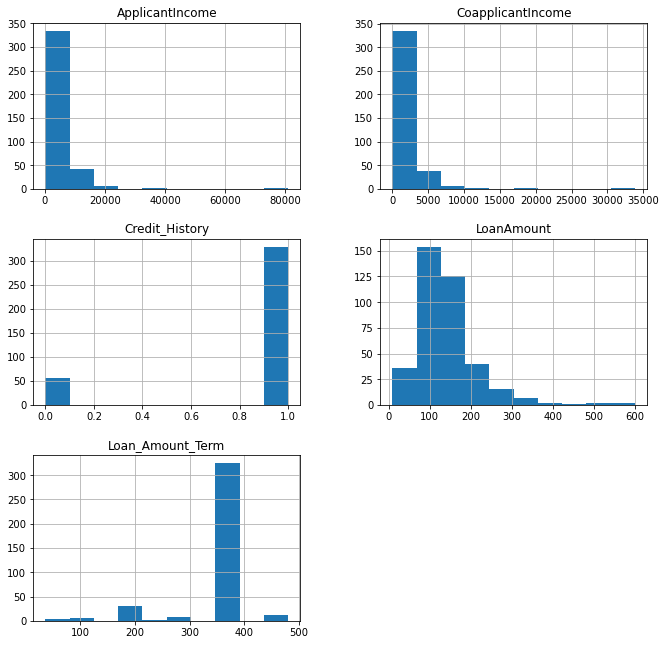

In [3]:
import matplotlib.pyplot as plt
X_train[X_train.dtypes[(X_train.dtypes=="float64")|(X_train.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])


In [4]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(X_train[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
X_test_minmax=min_max.fit_transform(X_test[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

In [5]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_minmax,Y_train)
# Checking the model's accuracy
accuracy_score(Y_test,knn.predict(X_test_minmax))

NameError: name 'KNeighborsClassifier' is not defined

In [6]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Importing training data set
X_train=pd.read_csv('X_train.csv')
Y_train=pd.read_csv('Y_train.csv')
print("\nShape of train set:", X_train.shape, Y_train.shape)

X_test=pd.read_csv('X_test.csv')
Y_test=pd.read_csv('Y_test.csv')
print("\nShape of test set:", X_test.shape, Y_test.shape)

# Initializing and Fitting a k-NN model
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']],Y_train.values.ravel())

# Checking the performance of our model on the testing data set
print("\nAccuracy score on test set :", accuracy_score(Y_test,knn.predict(X_test[['ApplicantIncome','CoapplicantIncome','LoanAmount', 'Loan_Amount_Term','Credit_History']])))

# We got around 61% of correct prediction which is not bad but in real world practices will this be enough ? Can we deploy this model in real world problem? To answer this question lets take a look at distribution of Loan_Status in train data set.

print("\nDistribution of Loan_Status in train set :")
print(Y_train.Target.value_counts()/Y_train.Target.count())

# There are 70% of approved loans, since there are more number of approved loans we will generate a prediction where all the loans are approved and lets go ahead and check the accuracy of our prediction

print("\nDistribution of Loan_Status in predictions on the test set :")
print(Y_test.Target.value_counts()/Y_test.Target.count())


Shape of train set: (384, 12) (384, 1)

Shape of test set: (96, 12) (96, 1)

Accuracy score on test set : 0.6145833333333334

Distribution of Loan_Status in train set :
Y    0.705729
N    0.294271
Name: Target, dtype: float64

Distribution of Loan_Status in predictions on the test set :
Y    0.635417
N    0.364583
Name: Target, dtype: float64


In [7]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(X_train[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
X_test_minmax=min_max.fit_transform(X_test[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

In [8]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_minmax,Y_train)
# Checking the model's accuracy
accuracy_score(Y_test,knn.predict(X_test_minmax))

<ipython-input-8-e88494a9560f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train_minmax,Y_train)


0.75

In [9]:
from sklearn.preprocessing import scale
X_train_scale=scale(X_train[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
X_test_scale=scale(X_test[['ApplicantIncome', 'CoapplicantIncome',
               'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
# Fitting logistic regression on our standardized data set
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(penalty='l2',C=.01)
log.fit(X_train_scale,Y_train)
# Checking the model's accuracy
accuracy_score(Y_test,log.predict(X_test_scale))

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.75

In [10]:
log=LogisticRegression(penalty='l2',C=.01)
log.fit(X_train,Y_train)
# Checking the model's accuracy
accuracy_score(Y_test,log.predict(X_test))

ValueError: could not convert string to float: 'Semiurban'

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# Iterating over all the common columns in train and test
for col in X_test.columns.values:
    if X_test[col].dtypes=='object':
        data=X_train[col].append(X_test[col])
        le.fit(data.values)
        X_train[col]=le.transform(X_train[col])
        X_test[col]=le.transform(X_test[col])

In [22]:
X_train_scale=scale(X_train)
X_test_scale=scale(X_test)
# Fitting the logistic regression model
log=LogisticRegression(penalty='l2',C=.01)
log.fit(X_train_scale,Y_train)
# Checking the models accuracy
accuracy_score(Y_test,log.predict(X_test_scale))

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7395833333333334

In [23]:
# We are using scaled variable as we saw in previous section that 
# scaling will effect the algo with l1 or l2 reguralizer
X_train_scale=scale(X_train)
X_test_scale=scale(X_test)
# Fitting a logistic regression model
log=LogisticRegression(penalty='l2',C=1)
log.fit(X_train_scale,Y_train)
# Checking the model's accuracy
accuracy_score(Y_test,log.predict(X_test_scale))

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7395833333333334

In [28]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(sparse=False)
X_train_1=X_train
X_test_1=X_test
columns=['Gender', 'Married', 'Dependents', 'Education','Self_Employed',
          'Credit_History', 'Property_Area']
for col in columns:
       # creating an exhaustive list of all possible categorical values
        data=X_train[[col]].append(X_test[[col]])
        enc.fit(data)
        temp = enc.transform(X_train[[col]])
        temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col]
            .value_counts().index])
        temp=temp.set_index(X_train.index.values)
        X_train_1=pd.concat([X_train_1,temp],axis=1)
        temp = enc.transform(X_test[[col]])
        temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col]
            .value_counts().index])
        temp=temp.set_index(X_test.index.values)
        X_test_1=pd.concat([X_test_1,temp],axis=1)

In [29]:
# Standardizing the data set
X_train_scale=scale(X_train_1)
X_test_scale=scale(X_test_1)
# Fitting a logistic regression model
log=LogisticRegression(penalty='l2',C=1)
log.fit(X_train_scale,Y_train)
# Checking the model's accuracy
accuracy_score(Y_test,log.predict(X_test_scale))

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.75